In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

ModuleNotFoundError: No module named 'pandas'

# Import and Preprocess Original Image

In [ ]:
df_batteryLidImages = pd.read_csv('D:\\Volvo\\BatteryLidImages.csv')
df_batteryLidImages['ExpandedStr'] = df_batteryLidImages['Expanded']
df_batteryLidImages

,Unnamed: 0,File_Name,SSIM,Expanded,ExpandedStr
0,0,WIN_20240307_14_59_52_Pro_272_000001,0.751425,Unexpanded,Unexpanded
1,1,WIN_20240307_14_59_52_Pro_273_000002,0.746898,Unexpanded,Unexpanded
2,2,WIN_20240307_14_59_52_Pro_274_000003,0.747401,Unexpanded,Unexpanded
3,3,WIN_20240307_14_59_52_Pro_275_000004,0.747409,Unexpanded,Unexpanded
4,4,WIN_20240307_14_59_52_Pro_276_000005,0.745905,Unexpanded,Unexpanded
...,...,...,...,...,...
19530,19530,WIN_20240307_19_43_34_Pro_56_019531,0.884496,Expanded,Expanded
19531,19531,WIN_20240307_19_43_34_Pro_57_019532,0.881914,Expanded,Expanded
19532,19532,WIN_20240307_19_43_34_Pro_58_019533,0.883714,Expanded,Expanded
19533,19533,WIN_20240307_19_43_34_Pro_59_019534,0.881472,Expanded,Expanded


In [ ]:
class_names = ['Unexpanded', 'Expanded']

# Define the predefined class variable names
# Convert the categorical variable to Categorical datatype and specify the class variable names
df_batteryLidImages['Expanded'] = pd.Categorical(df_batteryLidImages['Expanded'], categories=class_names)

df_batteryLidImages['Expanded'] = df_batteryLidImages['Expanded'].cat.codes.astype(str)
df_batteryLidImages

,Unnamed: 0,File_Name,SSIM,Expanded,ExpandedStr
0,0,WIN_20240307_14_59_52_Pro_272_000001,0.751425,0,Unexpanded
1,1,WIN_20240307_14_59_52_Pro_273_000002,0.746898,0,Unexpanded
2,2,WIN_20240307_14_59_52_Pro_274_000003,0.747401,0,Unexpanded
3,3,WIN_20240307_14_59_52_Pro_275_000004,0.747409,0,Unexpanded
4,4,WIN_20240307_14_59_52_Pro_276_000005,0.745905,0,Unexpanded
...,...,...,...,...,...
19530,19530,WIN_20240307_19_43_34_Pro_56_019531,0.884496,1,Expanded
19531,19531,WIN_20240307_19_43_34_Pro_57_019532,0.881914,1,Expanded
19532,19532,WIN_20240307_19_43_34_Pro_58_019533,0.883714,1,Expanded
19533,19533,WIN_20240307_19_43_34_Pro_59_019534,0.881472,1,Expanded


In [ ]:
df_batteryLidImages_original = df_batteryLidImages
df_batteryLidImages_original['File_Name'] = "D:\\Volvo\\BatteryLid Images Sealing\\" + df_batteryLidImages_original['ExpandedStr'] + "\\" + df_batteryLidImages_original['File_Name'] + ".jpg"
df_batteryLidImages_original = df_batteryLidImages[['File_Name', 'Expanded']]
df_batteryLidImages_original.head()

,File_Name,Expanded
0,D:\Volvo\BatteryLid Images Sealing\Unexpanded\...,0
1,D:\Volvo\BatteryLid Images Sealing\Unexpanded\...,0
2,D:\Volvo\BatteryLid Images Sealing\Unexpanded\...,0
3,D:\Volvo\BatteryLid Images Sealing\Unexpanded\...,0
4,D:\Volvo\BatteryLid Images Sealing\Unexpanded\...,0


In [ ]:
# Function to load and preprocess images
def preprocess_image(file_path, target_size=(150, 150)):
    img = cv2.imread(file_path)  # Read image
    img = cv2.resize(img, target_size)  # Resize image to a uniform size
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = img.flatten()  # Flatten image into a 1D array
    return img

In [ ]:
image_files_original = df_batteryLidImages_original['File_Name']
X_original = np.array([preprocess_image(file) for file in image_files_original])
y_original = df_batteryLidImages_original['Expanded']

In [ ]:
# Creating the common function for splitting the dataset into test, training and validation samples
def CreateSplitTestAndTrainData(X, y):
    # Creating test, validation and training samples from the dataset with 15% test, 15% validation and 70% train samples
    # Holding out 15% of all data to be used for testing purposes.
    X1, X_test, y1, y_test = train_test_split(X, y, test_size = 0.15, random_state = 15)
    
    #Split again into training and validation samples
    X_train, X_valid, y_train, y_valid = train_test_split(X1, y1, test_size = 0.17647, random_state = 15)
    
    return X_train, X_test, X_valid, y_train, y_test, y_valid

In [ ]:
# Creating test, training and validation samples from the dataset by calling the function created
X_train_original, X_test_original, X_valid_original, y_train_original, y_test_original, y_valid_original = CreateSplitTestAndTrainData(X_original, y_original)

In [ ]:
print("The size of training dataset is: ", X_train_original.shape)
print("The size of validation dataset is: ", X_valid_original.shape)
print("The size of testing dataset is: ", X_test_original.shape)
print("The size of training dataset y is: ", y_train_original.shape)
print("The size of validation dataset y is: ", y_valid_original.shape)
print("The size of testing dataset y is: ", y_test_original.shape)

The size of training dataset is:  (13673, 22500)
The size of validation dataset is:  (2931, 22500)
The size of testing dataset is:  (2931, 22500)
The size of training dataset y is:  (13673,)
The size of validation dataset y is:  (2931,)
The size of testing dataset y is:  (2931,)


# Preprocess Image After Adaptive Gaussian Thresholding

In [ ]:
df_batteryLidImages_thresh_gauss = df_batteryLidImages
df_batteryLidImages_thresh_gauss['File_Name'] = df_batteryLidImages_thresh_gauss['File_Name'].str.replace('BatteryLid Images Sealing', 'BatteryLid Images Threshold Gaussian')
df_batteryLidImages_thresh_gauss = df_batteryLidImages[['File_Name', 'Expanded']]
df_batteryLidImages_thresh_gauss.head()

,File_Name,Expanded
0,D:\Volvo\BatteryLid Images Threshold Gaussian\...,0
1,D:\Volvo\BatteryLid Images Threshold Gaussian\...,0
2,D:\Volvo\BatteryLid Images Threshold Gaussian\...,0
3,D:\Volvo\BatteryLid Images Threshold Gaussian\...,0
4,D:\Volvo\BatteryLid Images Threshold Gaussian\...,0


In [ ]:
image_files_thresh_gauss = df_batteryLidImages_thresh_gauss['File_Name']
X_thresh_gauss = np.array([preprocess_image(file) for file in image_files_thresh_gauss])
y_thresh_gauss = df_batteryLidImages_thresh_gauss['Expanded']

In [ ]:
# Creating test, training and validation samples from the dataset by calling the function created
X_train_thresh_gauss, X_test_thresh_gauss, X_valid_thresh_gauss, y_train_thresh_gauss, y_test_thresh_gauss, y_valid_thresh_gauss = CreateSplitTestAndTrainData(X_thresh_gauss, y_thresh_gauss)

In [ ]:
print("The size of training dataset is: ", X_train_thresh_gauss.shape)
print("The size of validation dataset is: ", X_valid_thresh_gauss.shape)
print("The size of testing dataset is: ", X_test_thresh_gauss.shape)
print("The size of training dataset y is: ", y_train_thresh_gauss.shape)
print("The size of validation dataset y is: ", y_valid_thresh_gauss.shape)
print("The size of testing dataset y is: ", y_test_thresh_gauss.shape)

The size of training dataset is:  (13673, 22500)
The size of validation dataset is:  (2931, 22500)
The size of testing dataset is:  (2931, 22500)
The size of training dataset y is:  (13673,)
The size of validation dataset y is:  (2931,)
The size of testing dataset y is:  (2931,)


# Preprocess Image After Adaptive Mean Thresholding

In [ ]:
df_batteryLidImages_thresh_mean = df_batteryLidImages
df_batteryLidImages_thresh_mean['File_Name'] = df_batteryLidImages_thresh_mean['File_Name'].str.replace('BatteryLid Images Threshold Gaussian', 'BatteryLid Images Threshold Mean')
df_batteryLidImages_thresh_mean = df_batteryLidImages[['File_Name', 'Expanded']]
df_batteryLidImages_thresh_mean.head()

,File_Name,Expanded
0,D:\Volvo\BatteryLid Images Threshold Mean\Unex...,0
1,D:\Volvo\BatteryLid Images Threshold Mean\Unex...,0
2,D:\Volvo\BatteryLid Images Threshold Mean\Unex...,0
3,D:\Volvo\BatteryLid Images Threshold Mean\Unex...,0
4,D:\Volvo\BatteryLid Images Threshold Mean\Unex...,0


In [ ]:
image_files_thresh_mean = df_batteryLidImages_thresh_mean['File_Name']
X_thresh_mean = np.array([preprocess_image(file) for file in image_files_thresh_mean])
y_thresh_mean = df_batteryLidImages_thresh_mean['Expanded']

In [ ]:
# Creating test, training and validation samples from the dataset by calling the function created
X_train_thresh_mean, X_test_thresh_mean, X_valid_thresh_mean, y_train_thresh_mean, y_test_thresh_mean, y_valid_thresh_mean = CreateSplitTestAndTrainData(X_thresh_mean, y_thresh_mean)

In [ ]:
print("The size of training dataset is: ", X_train_thresh_mean.shape)
print("The size of validation dataset is: ", X_valid_thresh_mean.shape)
print("The size of testing dataset is: ", X_test_thresh_mean.shape)
print("The size of training dataset y is: ", y_train_thresh_mean.shape)
print("The size of validation dataset y is: ", y_valid_thresh_mean.shape)
print("The size of testing dataset y is: ", y_test_thresh_mean.shape)

The size of training dataset is:  (13673, 22500)
The size of validation dataset is:  (2931, 22500)
The size of testing dataset is:  (2931, 22500)
The size of training dataset y is:  (13673,)
The size of validation dataset y is:  (2931,)
The size of testing dataset y is:  (2931,)


# Preprocess Image After Gabor Filter

In [ ]:
df_batteryLidImages_gabor = df_batteryLidImages
df_batteryLidImages_gabor['File_Name'] = df_batteryLidImages_gabor['File_Name'].str.replace('BatteryLid Images Threshold Mean', 'BatteryLid Images Gabor')
df_batteryLidImages_gabor = df_batteryLidImages[['File_Name', 'Expanded']]
df_batteryLidImages_gabor.head()

,File_Name,Expanded
0,D:\Volvo\BatteryLid Images Gabor\Unexpanded\WI...,0
1,D:\Volvo\BatteryLid Images Gabor\Unexpanded\WI...,0
2,D:\Volvo\BatteryLid Images Gabor\Unexpanded\WI...,0
3,D:\Volvo\BatteryLid Images Gabor\Unexpanded\WI...,0
4,D:\Volvo\BatteryLid Images Gabor\Unexpanded\WI...,0


In [ ]:
image_files_gabor = df_batteryLidImages_gabor['File_Name']
X_gabor = np.array([preprocess_image(file) for file in image_files_gabor])
y_gabor = df_batteryLidImages_gabor['Expanded']

In [ ]:
# Creating test, training and validation samples from the dataset by calling the function created
X_train_gabor, X_test_gabor, X_valid_gabor, y_train_gabor, y_test_gabor, y_valid_gabor = CreateSplitTestAndTrainData(X_gabor, y_gabor)

In [ ]:
print("The size of training dataset is: ", X_train_gabor.shape)
print("The size of validation dataset is: ", X_valid_gabor.shape)
print("The size of testing dataset is: ", X_test_gabor.shape)
print("The size of training dataset y is: ", y_train_gabor.shape)
print("The size of validation dataset y is: ", y_valid_gabor.shape)
print("The size of testing dataset y is: ", y_test_gabor.shape)

The size of training dataset is:  (13673, 22500)
The size of validation dataset is:  (2931, 22500)
The size of testing dataset is:  (2931, 22500)
The size of training dataset y is:  (13673,)
The size of validation dataset y is:  (2931,)
The size of testing dataset y is:  (2931,)


# Preprocess Image After Gabor Filter And Adaptive Gaussian Threshold

In [ ]:
df_batteryLidImages_gabor_thresh_gauss = df_batteryLidImages
df_batteryLidImages_gabor_thresh_gauss['File_Name'] = df_batteryLidImages_gabor_thresh_gauss['File_Name'].str.replace('BatteryLid Images Gabor', 'BatteryLid Images Gabor Threshold Gaussian')
df_batteryLidImages_gabor_thresh_gauss = df_batteryLidImages[['File_Name', 'Expanded']]
df_batteryLidImages_gabor_thresh_gauss.head()

,File_Name,Expanded
0,D:\Volvo\BatteryLid Images Gabor Threshold Gau...,0
1,D:\Volvo\BatteryLid Images Gabor Threshold Gau...,0
2,D:\Volvo\BatteryLid Images Gabor Threshold Gau...,0
3,D:\Volvo\BatteryLid Images Gabor Threshold Gau...,0
4,D:\Volvo\BatteryLid Images Gabor Threshold Gau...,0


In [ ]:
image_files_gabor_thresh_gauss = df_batteryLidImages_gabor_thresh_gauss['File_Name']
X_gabor_thresh_gauss = np.array([preprocess_image(file) for file in image_files_gabor_thresh_gauss])
y_gabor_thresh_gauss = df_batteryLidImages_gabor_thresh_gauss['Expanded']

In [ ]:
# Creating test, training and validation samples from the dataset by calling the function created
X_train_gabor_thresh_gauss, X_test_gabor_thresh_gauss, X_valid_gabor_thresh_gauss, y_train_gabor_thresh_gauss, y_test_gabor_thresh_gauss, y_valid_gabor_thresh_gauss = CreateSplitTestAndTrainData(X_gabor_thresh_gauss, y_gabor_thresh_gauss)

In [ ]:
print("The size of training dataset is: ", X_train_gabor_thresh_gauss.shape)
print("The size of validation dataset is: ", X_valid_gabor_thresh_gauss.shape)
print("The size of testing dataset is: ", X_test_gabor_thresh_gauss.shape)
print("The size of training dataset y is: ", y_train_gabor_thresh_gauss.shape)
print("The size of validation dataset y is: ", y_valid_gabor_thresh_gauss.shape)
print("The size of testing dataset y is: ", y_test_gabor_thresh_gauss.shape)

The size of training dataset is:  (13673, 22500)
The size of validation dataset is:  (2931, 22500)
The size of testing dataset is:  (2931, 22500)
The size of training dataset y is:  (13673,)
The size of validation dataset y is:  (2931,)
The size of testing dataset y is:  (2931,)


# Preprocess Image After Gabor Filter And Adaptive Mean Threshold

In [ ]:
df_batteryLidImages_gabor_thresh_mean = df_batteryLidImages
df_batteryLidImages_gabor_thresh_mean['File_Name'] = df_batteryLidImages_gabor_thresh_mean['File_Name'].str.replace('BatteryLid Images Gabor Threshold Gaussian', 'BatteryLid Images Gabor Threshold Mean')
df_batteryLidImages_gabor_thresh_mean = df_batteryLidImages[['File_Name', 'Expanded']]
df_batteryLidImages_gabor_thresh_mean.head()

,File_Name,Expanded
0,D:\Volvo\BatteryLid Images Gabor Threshold Mea...,0
1,D:\Volvo\BatteryLid Images Gabor Threshold Mea...,0
2,D:\Volvo\BatteryLid Images Gabor Threshold Mea...,0
3,D:\Volvo\BatteryLid Images Gabor Threshold Mea...,0
4,D:\Volvo\BatteryLid Images Gabor Threshold Mea...,0


In [ ]:
image_files_gabor_thresh_mean = df_batteryLidImages_gabor_thresh_mean['File_Name']
X_gabor_thresh_mean = np.array([preprocess_image(file) for file in image_files_gabor_thresh_mean])
y_gabor_thresh_mean = df_batteryLidImages_gabor_thresh_mean['Expanded']

In [ ]:
# Creating test, training and validation samples from the dataset by calling the function created
X_train_gabor_thresh_mean, X_test_gabor_thresh_mean, X_valid_gabor_thresh_mean, y_train_gabor_thresh_mean, y_test_gabor_thresh_mean, y_valid_gabor_thresh_mean = CreateSplitTestAndTrainData(X_gabor_thresh_mean, y_gabor_thresh_mean)

In [ ]:
print("The size of training dataset is: ", X_train_gabor_thresh_mean.shape)
print("The size of validation dataset is: ", X_valid_gabor_thresh_mean.shape)
print("The size of testing dataset is: ", X_test_gabor_thresh_mean.shape)
print("The size of training dataset y is: ", y_train_gabor_thresh_mean.shape)
print("The size of validation dataset y is: ", y_valid_gabor_thresh_mean.shape)
print("The size of testing dataset y is: ", y_test_gabor_thresh_mean.shape)

The size of training dataset is:  (13673, 22500)
The size of validation dataset is:  (2931, 22500)
The size of testing dataset is:  (2931, 22500)
The size of training dataset y is:  (13673,)
The size of validation dataset y is:  (2931,)
The size of testing dataset y is:  (2931,)


# Build Random Forest Models

# Build RF Model with Original Image

In [ ]:
# Load the CNN evaluation results
evaluation_results = pd.read_csv('D:\\Volvo\\EvaluationResults.csv')
evaluation_results = evaluation_results.drop(columns = evaluation_results.columns[0])
evaluation_results

,Model,Accuracy,Precision,TPR,TNR,F_Score,ROC_Value,MCC,Threshold
0,CNN with Original image,0.988400,0.982603,0.993666,0.983444,0.988104,0.999601,0.976844,0.673184
1,CNN with Image After Adaptive Gaussian Thresho...,0.988400,0.982603,0.993666,0.983444,0.988104,0.999222,0.976844,0.530475
2,CNN with Image After Adaptive Mean Thresholding,0.990106,0.984680,0.995074,0.985430,0.989849,0.999611,0.980251,0.724586
3,CNN with Image After Gabor Filter,0.990447,0.990148,0.990148,0.990728,0.990148,0.999688,0.980876,0.435529
4,CNN with Image After Gabor Filter and Adaptive...,0.989082,0.987368,0.990148,0.988079,0.988756,0.999671,0.978150,0.579517
5,CNN with Image After Gabor Filter and Adaptive...,0.988741,0.990806,0.985925,0.991391,0.988360,0.999424,0.977469,0.362923


In [ ]:
# Initialize and train Random Forest classifier
clf_original = RandomForestClassifier(n_estimators = 100)
clf_original.fit(X_train_original, y_train_original)

RandomForestClassifier()

In [ ]:
# Evaluate model on validation set
valid_accuracy_original = clf_original.score(X_valid_original, y_valid_original)
print("Validation Accuracy of Random Forest Model with the Original Image:", valid_accuracy_original)

Validation Accuracy of Random Forest Model with the Original Image: 0.9931763903104742


In [ ]:
# Evaluate model on test set
test_accuracy_original = clf_original.score(X_test_original, y_test_original)
print("Test Accuracy of Random Forest Model with the Original Image:", test_accuracy_original)

Test Accuracy of Random Forest Model with the Original Image: 0.9969293756397134


In [ ]:
y_pred_original = clf_original.predict(X_test_original)
y_pred_prob_original = clf_original.predict_proba(X_test_original)
y_pred_prob_original = np.argmax(y_pred_prob_original, axis=1)

In [ ]:
def Calculate_Errors(model, y_test, y_pred, y_pred_probs):
    
 global evaluation_results
    
 # Calculate Accuracy of the model
 Accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
  
 # Calculate Precision of the model
 Precision = metrics.precision_score(y_true=y_test, y_pred=y_pred, pos_label='1')
  
 # Calculate True Positive Rate (Recall) of the model
 TPR = metrics.recall_score(y_true=y_test, y_pred=y_pred, pos_label='1')
  
 # Calculate F Score of of the model
 F_Score = metrics.f1_score(y_true=y_test, y_pred=y_pred, pos_label='1')
    
 # Calculate MCC of the model
 MCC = metrics.matthews_corrcoef(y_true=y_test, y_pred=y_pred)

 # Calculate TNR(Specificity) of the model
 tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()
 TNR = tn / (tn+fp)

 # Calculate the ROC
 roc_value = roc_auc_score(y_test, y_pred_probs)

 fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs, pos_label='1')
 threshold = thresholds[np.argmax(tpr-fpr)]

 # Plot the ROC for the model
 roc_auc = metrics.auc(fpr, tpr)
 print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
 plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
 plt.legend(loc=4)
 plt.show()

 # Append the model results to the result dataframe 
 evaluation_results = evaluation_results.append(pd.DataFrame({'Model': model, 'Accuracy': Accuracy, 'Precision': Precision, 'TPR': TPR, 'TNR': TNR, 'F_Score': F_Score, 'ROC_Value': roc_value, 'MCC': MCC, 'Threshold': threshold}, index=[0]), ignore_index=True) 

ROC for the test dataset 99.7%


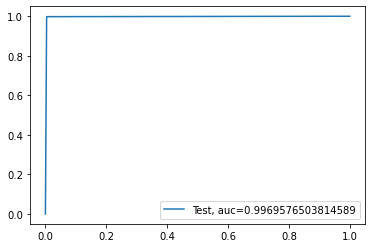

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_4888\3547552962.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append(pd.DataFrame({'Model': model, 'Accuracy': Accuracy, 'Precision': Precision, 'TPR': TPR, 'TNR': TNR, 'F_Score': F_Score, 'ROC_Value': roc_value, 'MCC': MCC, 'Threshold': threshold}, index=[0]), ignore_index=True)


,Model,Accuracy,Precision,TPR,TNR,F_Score,ROC_Value,MCC,Threshold
0,CNN with Original image,0.988400,0.982603,0.993666,0.983444,0.988104,0.999601,0.976844,0.673184
1,CNN with Image After Adaptive Gaussian Thresho...,0.988400,0.982603,0.993666,0.983444,0.988104,0.999222,0.976844,0.530475
2,CNN with Image After Adaptive Mean Thresholding,0.990106,0.984680,0.995074,0.985430,0.989849,0.999611,0.980251,0.724586
3,CNN with Image After Gabor Filter,0.990447,0.990148,0.990148,0.990728,0.990148,0.999688,0.980876,0.435529
4,CNN with Image After Gabor Filter and Adaptive...,0.989082,0.987368,0.990148,0.988079,0.988756,0.999671,0.978150,0.579517
5,CNN with Image After Gabor Filter and Adaptive...,0.988741,0.990806,0.985925,0.991391,0.988360,0.999424,0.977469,0.362923
6,Random Forest with Original image,0.996929,0.995787,0.997889,0.996026,0.996837,0.996958,0.993856,1.000000


In [ ]:
Calculate_Errors('Random Forest with Original image', y_test_original, y_pred_original, y_pred_prob_original)
evaluation_results

In [ ]:
def Create_RedAndGreen_ColorMap():
 # Define red and green colors
 red = [1, 0, 0]   # Full red
 green = [0, 1, 0] # Full green

 # Create custom colormap with only two colors (red and green)
 cmap_colors = [red, green]
 custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', cmap_colors, N=2)
    
 return custom_cmap

In [ ]:
# Created a common function to plot confusion matrix
def Plot_Confusion_Matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap = Create_RedAndGreen_ColorMap()) #plt.cm.Set1)
  categoryNames = ['Unexpanded','Expanded']
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]), fontsize=12, ha = 'center')
  plt.show()

In [ ]:
# Print Classification Report
print("Classification Report for Random Forest with Original image")
print(classification_report(y_test_original, y_pred_original))

Classification Report for Random Forest with Original image
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1510
           1       1.00      1.00      1.00      1421

    accuracy                           1.00      2931
   macro avg       1.00      1.00      1.00      2931
weighted avg       1.00      1.00      1.00      2931



Confusion Matrix for Random Forest with Original image


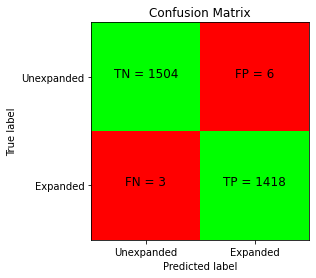

In [ ]:
# Plot Confusion Matrix
print("Confusion Matrix for Random Forest with Original image")
Plot_Confusion_Matrix(y_test_original, y_pred_original)

# Build Random Forest Model with Image After Adaptive Gaussian Thresholding

In [ ]:
# Initialize and train Random Forest classifier
clf_thresh_gauss = RandomForestClassifier(n_estimators = 100)
clf_thresh_gauss.fit(X_train_thresh_gauss, y_train_thresh_gauss)

RandomForestClassifier()

In [ ]:
# Evaluate model on validation set
valid_accuracy_thresh_gauss = clf_thresh_gauss.score(X_valid_thresh_gauss, y_valid_thresh_gauss)
print("Validation Accuracy of Random Forest Model with Image After Adaptive Gaussian Thresholding:", valid_accuracy_thresh_gauss)

Validation Accuracy of Random Forest Model with Image After Adaptive Gaussian Thresholding: 0.989423404981235


In [ ]:
# Evaluate model on test set
test_accuracy_thresh_gauss = clf_thresh_gauss.score(X_test_thresh_gauss, y_test_thresh_gauss)
print("Test Accuracy of Random Forest Model with Image After Adaptive Gaussian Thresholding:", test_accuracy_thresh_gauss)

Test Accuracy of Random Forest Model with Image After Adaptive Gaussian Thresholding: 0.9883998635278062


In [ ]:
y_pred_thresh_gauss = clf_thresh_gauss.predict(X_test_thresh_gauss)
y_pred_prob_thresh_gauss = clf_thresh_gauss.predict_proba(X_test_thresh_gauss)
y_pred_prob_thresh_gauss = np.argmax(y_pred_prob_thresh_gauss, axis=1)

ROC for the test dataset 98.8%


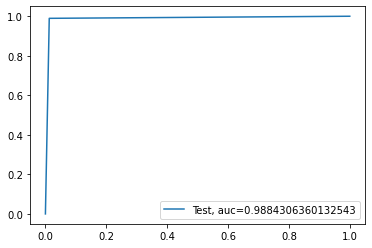

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_4888\3547552962.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append(pd.DataFrame({'Model': model, 'Accuracy': Accuracy, 'Precision': Precision, 'TPR': TPR, 'TNR': TNR, 'F_Score': F_Score, 'ROC_Value': roc_value, 'MCC': MCC, 'Threshold': threshold}, index=[0]), ignore_index=True)


,Model,Accuracy,Precision,TPR,TNR,F_Score,ROC_Value,MCC,Threshold
0,CNN with Original image,0.988400,0.982603,0.993666,0.983444,0.988104,0.999601,0.976844,0.673184
1,CNN with Image After Adaptive Gaussian Thresho...,0.988400,0.982603,0.993666,0.983444,0.988104,0.999222,0.976844,0.530475
2,CNN with Image After Adaptive Mean Thresholding,0.990106,0.984680,0.995074,0.985430,0.989849,0.999611,0.980251,0.724586
3,CNN with Image After Gabor Filter,0.990447,0.990148,0.990148,0.990728,0.990148,0.999688,0.980876,0.435529
4,CNN with Image After Gabor Filter and Adaptive...,0.989082,0.987368,0.990148,0.988079,0.988756,0.999671,0.978150,0.579517
5,CNN with Image After Gabor Filter and Adaptive...,0.988741,0.990806,0.985925,0.991391,0.988360,0.999424,0.977469,0.362923
6,Random Forest with Original image,0.996929,0.995787,0.997889,0.996026,0.996837,0.996958,0.993856,1.000000
7,Random Forest with Image After Adaptive Gaussi...,0.988400,0.986667,0.989444,0.987417,0.988053,0.988431,0.976784,1.000000


In [ ]:
Calculate_Errors('Random Forest with Image After Adaptive Gaussian Thresholding', y_test_thresh_gauss, y_pred_thresh_gauss, y_pred_prob_thresh_gauss)
evaluation_results

In [ ]:
# Print Classification Report
print("Classification Report for Random Forest with Image After Adaptive Gaussian Thresholding")
print(classification_report(y_test_thresh_gauss, y_pred_thresh_gauss))

Classification Report for Random Forest with Image After Adaptive Gaussian Thresholding
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1510
           1       0.99      0.99      0.99      1421

    accuracy                           0.99      2931
   macro avg       0.99      0.99      0.99      2931
weighted avg       0.99      0.99      0.99      2931



Confusion Matrix for Random Forest with Image After Adaptive Gaussian Thresholding


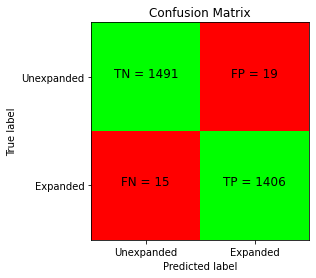

In [ ]:
# Plot Confusion Matrix
print("Confusion Matrix for Random Forest with Image After Adaptive Gaussian Thresholding")
Plot_Confusion_Matrix(y_test_thresh_gauss, y_pred_thresh_gauss)

# Build Random Forest Model with Image After Adaptive Mean Thresholding

In [ ]:
# Initialize and train Random Forest classifier
clf_thresh_mean = RandomForestClassifier(n_estimators = 100)
clf_thresh_mean.fit(X_train_thresh_mean, y_train_thresh_mean)

RandomForestClassifier()

In [ ]:
# Evaluate model on validation set
valid_accuracy_thresh_mean = clf_thresh_mean.score(X_valid_thresh_mean, y_valid_thresh_mean)
print("Validation Accuracy of Random Forest Model with Image After Adaptive Mean Thresholding:", valid_accuracy_thresh_mean)

Validation Accuracy of Random Forest Model with Image After Adaptive Mean Thresholding: 0.9931763903104742


In [ ]:
# Evaluate model on test set
test_accuracy_thresh_mean = clf_thresh_mean.score(X_test_thresh_mean, y_test_thresh_mean)
print("Test Accuracy of Random Forest Model with Image After Adaptive Mean Thresholding:", test_accuracy_thresh_mean)

Test Accuracy of Random Forest Model with Image After Adaptive Mean Thresholding: 0.9931763903104742


In [ ]:
y_pred_thresh_mean = clf_thresh_mean.predict(X_test_thresh_mean)
y_pred_prob_thresh_mean = clf_thresh_mean.predict_proba(X_test_thresh_mean)
y_pred_prob_thresh_mean = np.argmax(y_pred_prob_thresh_mean, axis=1)

ROC for the test dataset 99.3%


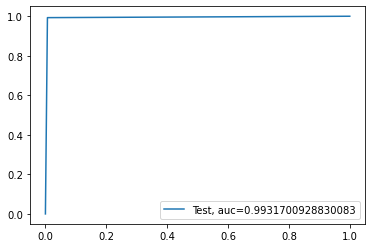

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_4888\3547552962.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append(pd.DataFrame({'Model': model, 'Accuracy': Accuracy, 'Precision': Precision, 'TPR': TPR, 'TNR': TNR, 'F_Score': F_Score, 'ROC_Value': roc_value, 'MCC': MCC, 'Threshold': threshold}, index=[0]), ignore_index=True)


,Model,Accuracy,Precision,TPR,TNR,F_Score,ROC_Value,MCC,Threshold
0,CNN with Original image,0.988400,0.982603,0.993666,0.983444,0.988104,0.999601,0.976844,0.673184
1,CNN with Image After Adaptive Gaussian Thresho...,0.988400,0.982603,0.993666,0.983444,0.988104,0.999222,0.976844,0.530475
2,CNN with Image After Adaptive Mean Thresholding,0.990106,0.984680,0.995074,0.985430,0.989849,0.999611,0.980251,0.724586
3,CNN with Image After Gabor Filter,0.990447,0.990148,0.990148,0.990728,0.990148,0.999688,0.980876,0.435529
4,CNN with Image After Gabor Filter and Adaptive...,0.989082,0.987368,0.990148,0.988079,0.988756,0.999671,0.978150,0.579517
5,CNN with Image After Gabor Filter and Adaptive...,0.988741,0.990806,0.985925,0.991391,0.988360,0.999424,0.977469,0.362923
6,Random Forest with Original image,0.996929,0.995787,0.997889,0.996026,0.996837,0.996958,0.993856,1.000000
7,Random Forest with Image After Adaptive Gaussi...,0.988400,0.986667,0.989444,0.987417,0.988053,0.988431,0.976784,1.000000
8,Random Forest with Image After Adaptive Mean T...,0.993176,0.992963,0.992963,0.993377,0.992963,0.993170,0.986340,1.000000


In [ ]:
Calculate_Errors('Random Forest with Image After Adaptive Mean Thresholding', y_test_thresh_mean, y_pred_thresh_mean, y_pred_prob_thresh_mean)
evaluation_results

In [ ]:
# Print Classification Report
print("Classification Report for Random Forest with Image After Adaptive Mean Thresholding")
print(classification_report(y_test_thresh_mean, y_pred_thresh_mean))

Classification Report for Random Forest with Image After Adaptive Mean Thresholding
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1510
           1       0.99      0.99      0.99      1421

    accuracy                           0.99      2931
   macro avg       0.99      0.99      0.99      2931
weighted avg       0.99      0.99      0.99      2931



Confusion Matrix for Random Forest with Image After Adaptive Mean Thresholding


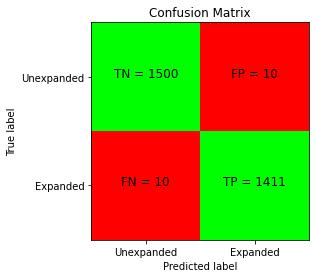

In [ ]:
# Plot Confusion Matrix
print("Confusion Matrix for Random Forest with Image After Adaptive Mean Thresholding")
Plot_Confusion_Matrix(y_test_thresh_mean, y_pred_thresh_mean)

# Build Random Forest Model with Image After Gabor Filter

In [ ]:
# Initialize and train Random Forest classifier
clf_gabor = RandomForestClassifier(n_estimators = 100)
clf_gabor.fit(X_train_gabor, y_train_gabor)

RandomForestClassifier()

In [ ]:
# Evaluate model on validation set
valid_accuracy_gabor = clf_gabor.score(X_valid_gabor, y_valid_gabor)
print("Validation Accuracy of Random Forest Model with Image After Gabor Filter:", valid_accuracy_gabor)

Validation Accuracy of Random Forest Model with Image After Gabor Filter: 0.9935175707949505


In [ ]:
# Evaluate model on test set
test_accuracy_gabor = clf_gabor.score(X_test_gabor, y_test_gabor)
print("Test Accuracy of Random Forest Model with Image After Gabor Filter:", test_accuracy_gabor)

Test Accuracy of Random Forest Model with Image After Gabor Filter: 0.9959058341862845


In [ ]:
y_pred_gabor = clf_gabor.predict(X_test_gabor)
y_pred_prob_gabor = clf_gabor.predict_proba(X_test_gabor)
y_pred_prob_gabor = np.argmax(y_pred_prob_gabor, axis=1)

ROC for the test dataset 99.6%


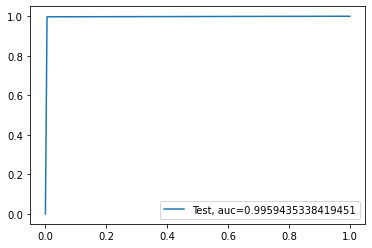

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_4888\3547552962.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append(pd.DataFrame({'Model': model, 'Accuracy': Accuracy, 'Precision': Precision, 'TPR': TPR, 'TNR': TNR, 'F_Score': F_Score, 'ROC_Value': roc_value, 'MCC': MCC, 'Threshold': threshold}, index=[0]), ignore_index=True)


,Model,Accuracy,Precision,TPR,TNR,F_Score,ROC_Value,MCC,Threshold
0,CNN with Original image,0.988400,0.982603,0.993666,0.983444,0.988104,0.999601,0.976844,0.673184
1,CNN with Image After Adaptive Gaussian Thresho...,0.988400,0.982603,0.993666,0.983444,0.988104,0.999222,0.976844,0.530475
2,CNN with Image After Adaptive Mean Thresholding,0.990106,0.984680,0.995074,0.985430,0.989849,0.999611,0.980251,0.724586
3,CNN with Image After Gabor Filter,0.990447,0.990148,0.990148,0.990728,0.990148,0.999688,0.980876,0.435529
4,CNN with Image After Gabor Filter and Adaptive...,0.989082,0.987368,0.990148,0.988079,0.988756,0.999671,0.978150,0.579517
5,CNN with Image After Gabor Filter and Adaptive...,0.988741,0.990806,0.985925,0.991391,0.988360,0.999424,0.977469,0.362923
6,Random Forest with Original image,0.996929,0.995787,0.997889,0.996026,0.996837,0.996958,0.993856,1.000000
7,Random Forest with Image After Adaptive Gaussi...,0.988400,0.986667,0.989444,0.987417,0.988053,0.988431,0.976784,1.000000
8,Random Forest with Image After Adaptive Mean T...,0.993176,0.992963,0.992963,0.993377,0.992963,0.993170,0.986340,1.000000
9,Random Forest with Image After Gabor Filter,0.995906,0.994386,0.997185,0.994702,0.995784,0.995944,0.991808,1.000000


In [ ]:
Calculate_Errors('Random Forest with Image After Gabor Filter', y_test_gabor, y_pred_gabor, y_pred_prob_gabor)
evaluation_results

In [ ]:
# Print Classification Report
print("Classification Report for Random Forest with Image After Gabor Filter")
print(classification_report(y_test_gabor, y_pred_gabor))

Classification Report for Random Forest with Image After Gabor Filter
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1510
           1       0.99      1.00      1.00      1421

    accuracy                           1.00      2931
   macro avg       1.00      1.00      1.00      2931
weighted avg       1.00      1.00      1.00      2931



Confusion Matrix for Random Forest with Image After Gabor Filter


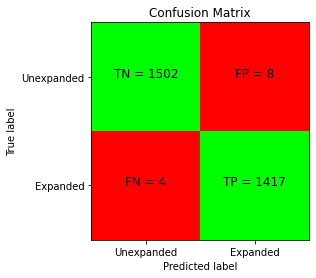

In [ ]:
# Plot Confusion Matrix
print("Confusion Matrix for Random Forest with Image After Gabor Filter")
Plot_Confusion_Matrix(y_test_gabor, y_pred_gabor)

# Build Random Forest Model with Image After Gabor Filter And Adaptive Gaussian Thresholding

In [ ]:
# Initialize and train Random Forest classifier
clf_gabor_thresh_gauss = RandomForestClassifier(n_estimators = 100)
clf_gabor_thresh_gauss.fit(X_train_gabor_thresh_gauss, y_train_gabor_thresh_gauss)

RandomForestClassifier()

In [ ]:
# Evaluate model on validation set
valid_accuracy_gabor_thresh_gauss = clf_gabor_thresh_gauss.score(X_valid_gabor_thresh_gauss, y_valid_gabor_thresh_gauss)
print("Validation Accuracy of Random Forest Model with Image After Gabor Filter And Adaptive Gaussian Thresholding:", valid_accuracy_gabor_thresh_gauss)

Validation Accuracy of Random Forest Model with Image After Gabor Filter And Adaptive Gaussian Thresholding: 0.9901057659501876


In [ ]:
# Evaluate model on test set
test_accuracy_gabor_thresh_gauss = clf_gabor_thresh_gauss.score(X_test_gabor_thresh_gauss, y_test_gabor_thresh_gauss)
print("Test Accuracy of Random Forest Model with Image After Gabor Filter And Adaptive Gaussian Thresholding:", test_accuracy_gabor_thresh_gauss)

Test Accuracy of Random Forest Model with Image After Gabor Filter And Adaptive Gaussian Thresholding: 0.9918116683725691


In [ ]:
y_pred_gabor_thresh_gauss = clf_gabor_thresh_gauss.predict(X_test_gabor_thresh_gauss)
y_pred_prob_gabor_thresh_gauss = clf_gabor_thresh_gauss.predict_proba(X_test_gabor_thresh_gauss)
y_pred_prob_gabor_thresh_gauss = np.argmax(y_pred_prob_gabor_thresh_gauss, axis=1)

ROC for the test dataset 99.2%


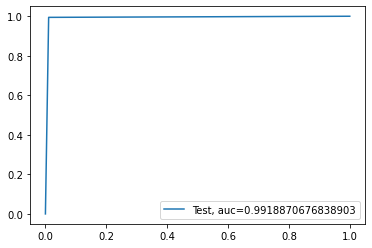

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_4888\3547552962.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append(pd.DataFrame({'Model': model, 'Accuracy': Accuracy, 'Precision': Precision, 'TPR': TPR, 'TNR': TNR, 'F_Score': F_Score, 'ROC_Value': roc_value, 'MCC': MCC, 'Threshold': threshold}, index=[0]), ignore_index=True)


,Model,Accuracy,Precision,TPR,TNR,F_Score,ROC_Value,MCC,Threshold
0,CNN with Original image,0.988400,0.982603,0.993666,0.983444,0.988104,0.999601,0.976844,0.673184
1,CNN with Image After Adaptive Gaussian Thresho...,0.988400,0.982603,0.993666,0.983444,0.988104,0.999222,0.976844,0.530475
2,CNN with Image After Adaptive Mean Thresholding,0.990106,0.984680,0.995074,0.985430,0.989849,0.999611,0.980251,0.724586
3,CNN with Image After Gabor Filter,0.990447,0.990148,0.990148,0.990728,0.990148,0.999688,0.980876,0.435529
4,CNN with Image After Gabor Filter and Adaptive...,0.989082,0.987368,0.990148,0.988079,0.988756,0.999671,0.978150,0.579517
5,CNN with Image After Gabor Filter and Adaptive...,0.988741,0.990806,0.985925,0.991391,0.988360,0.999424,0.977469,0.362923
6,Random Forest with Original image,0.996929,0.995787,0.997889,0.996026,0.996837,0.996958,0.993856,1.000000
7,Random Forest with Image After Adaptive Gaussi...,0.988400,0.986667,0.989444,0.987417,0.988053,0.988431,0.976784,1.000000
8,Random Forest with Image After Adaptive Mean T...,0.993176,0.992963,0.992963,0.993377,0.992963,0.993170,0.986340,1.000000
9,Random Forest with Image After Gabor Filter,0.995906,0.994386,0.997185,0.994702,0.995784,0.995944,0.991808,1.000000


In [ ]:
Calculate_Errors('Random Forest with Image After Gabor Filter and Adaptive Gaussian Thresholding', y_test_gabor_thresh_gauss, y_pred_gabor_thresh_gauss, y_pred_prob_gabor_thresh_gauss)
evaluation_results

In [ ]:
# Print Classification Report
print("Classification Report for Random Forest with Image After Gabor Filter and Adaptive Gaussian Thresholding")
print(classification_report(y_test_gabor_thresh_gauss, y_pred_gabor_thresh_gauss))

Classification Report for Random Forest with Image After Gabor Filter and Adaptive Gaussian Thresholding
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1510
           1       0.99      0.99      0.99      1421

    accuracy                           0.99      2931
   macro avg       0.99      0.99      0.99      2931
weighted avg       0.99      0.99      0.99      2931



Confusion Matrix for Random Forest with Image After Gabor Filter and Adaptive Gaussian Thresholding


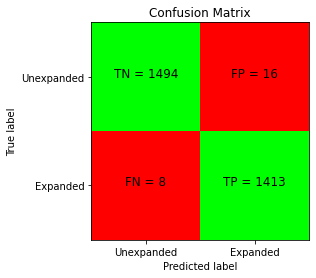

In [ ]:
# Plot Confusion Matrix
print("Confusion Matrix for Random Forest with Image After Gabor Filter and Adaptive Gaussian Thresholding")
Plot_Confusion_Matrix(y_test_gabor_thresh_gauss, y_pred_gabor_thresh_gauss)

# Build Random Forest Model with Image After Gabor Filter And Adaptive Mean Thresholding

In [ ]:
# Initialize and train Random Forest classifier
clf_gabor_thresh_mean = RandomForestClassifier(n_estimators = 100)
clf_gabor_thresh_mean.fit(X_train_gabor_thresh_mean, y_train_gabor_thresh_mean)

RandomForestClassifier()

In [ ]:
# Evaluate model on validation set
valid_accuracy_gabor_thresh_mean = clf_gabor_thresh_mean.score(X_valid_gabor_thresh_mean, y_valid_gabor_thresh_mean)
print("Validation Accuracy of Random Forest Model with Image After Gabor Filter And Adaptive Mean Thresholding:", valid_accuracy_gabor_thresh_mean)

Validation Accuracy of Random Forest Model with Image After Gabor Filter And Adaptive Mean Thresholding: 0.9904469464346639


In [ ]:
# Evaluate model on test set
test_accuracy_gabor_thresh_mean = clf_gabor_thresh_mean.score(X_test_gabor_thresh_mean, y_test_gabor_thresh_mean)
print("Test Accuracy of Random Forest Model with Image After Gabor Filter And Adaptive Mean Thresholding:", test_accuracy_gabor_thresh_mean)

Test Accuracy of Random Forest Model with Image After Gabor Filter And Adaptive Mean Thresholding: 0.9897645854657113


In [ ]:
y_pred_gabor_thresh_mean = clf_gabor_thresh_mean.predict(X_test_gabor_thresh_mean)
y_pred_prob_gabor_thresh_mean = clf_gabor_thresh_mean.predict_proba(X_test_gabor_thresh_mean)
y_pred_prob_gabor_thresh_mean = np.argmax(y_pred_prob_gabor_thresh_mean, axis=1)

ROC for the test dataset 99.0%


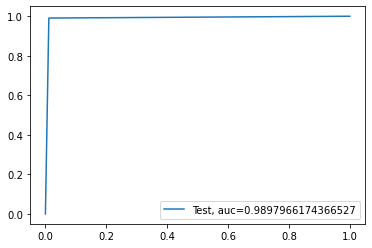

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_4888\3547552962.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append(pd.DataFrame({'Model': model, 'Accuracy': Accuracy, 'Precision': Precision, 'TPR': TPR, 'TNR': TNR, 'F_Score': F_Score, 'ROC_Value': roc_value, 'MCC': MCC, 'Threshold': threshold}, index=[0]), ignore_index=True)


,Model,Accuracy,Precision,TPR,TNR,F_Score,ROC_Value,MCC,Threshold
0,CNN with Original image,0.988400,0.982603,0.993666,0.983444,0.988104,0.999601,0.976844,0.673184
1,CNN with Image After Adaptive Gaussian Thresho...,0.988400,0.982603,0.993666,0.983444,0.988104,0.999222,0.976844,0.530475
2,CNN with Image After Adaptive Mean Thresholding,0.990106,0.984680,0.995074,0.985430,0.989849,0.999611,0.980251,0.724586
3,CNN with Image After Gabor Filter,0.990447,0.990148,0.990148,0.990728,0.990148,0.999688,0.980876,0.435529
4,CNN with Image After Gabor Filter and Adaptive...,0.989082,0.987368,0.990148,0.988079,0.988756,0.999671,0.978150,0.579517
5,CNN with Image After Gabor Filter and Adaptive...,0.988741,0.990806,0.985925,0.991391,0.988360,0.999424,0.977469,0.362923
6,Random Forest with Original image,0.996929,0.995787,0.997889,0.996026,0.996837,0.996958,0.993856,1.000000
7,Random Forest with Image After Adaptive Gaussi...,0.988400,0.986667,0.989444,0.987417,0.988053,0.988431,0.976784,1.000000
8,Random Forest with Image After Adaptive Mean T...,0.993176,0.992963,0.992963,0.993377,0.992963,0.993170,0.986340,1.000000
9,Random Forest with Image After Gabor Filter,0.995906,0.994386,0.997185,0.994702,0.995784,0.995944,0.991808,1.000000


In [ ]:
Calculate_Errors('Random Forest with Image After Gabor Filter and Adaptive Mean Thresholding', y_test_gabor_thresh_mean, y_pred_gabor_thresh_mean, y_pred_prob_gabor_thresh_mean)
evaluation_results

In [ ]:
# Print Classification Report
print("Classification Report for Random Forest with Image After Gabor Filter and Adaptive Mean Thresholding")
print(classification_report(y_test_gabor_thresh_mean, y_pred_gabor_thresh_mean))

Classification Report for Random Forest with Image After Gabor Filter and Adaptive Mean Thresholding
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1510
           1       0.99      0.99      0.99      1421

    accuracy                           0.99      2931
   macro avg       0.99      0.99      0.99      2931
weighted avg       0.99      0.99      0.99      2931



Confusion Matrix for Random Forest with Image After Gabor Filter and Adaptive Mean Thresholding


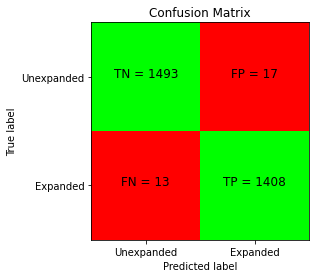

In [ ]:
# Plot Confusion Matrix
print("Confusion Matrix for Random Forest with Image After Gabor Filter and Adaptive Mean Thresholding")
Plot_Confusion_Matrix(y_test_gabor_thresh_mean, y_pred_gabor_thresh_mean)

In [ ]:
evaluation_results.to_csv('D:\\Volvo\\EvaluationResults.csv')